# Import Relevant Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Raw Data and Find Vinyl Peak

In [2]:
# Import raw data
df = pd.read_csv('t0_repeat_1.txt', delimiter = '\t') # Tab delimited.
df = df.drop(df.columns[0:3], axis=1) # Drop 1st 3 columns.
df

,99.466474,103.977689,108.486724,112.991457,117.494015,121.994401,126.490494,130.982299,135.476179,139.963656,...,2470.127521,2473.292006,2476.455263,2479.615672,2482.776474,2485.936050,2489.092782,2492.249908,2495.404193,2498.554024
0,557.0,569.0,651.0,679.0,776.0,796.0,842.0,889.0,1001.0,971.0,...,1782.0,1806.0,1911.0,1871.0,1827.0,1896.0,1861.0,1889.0,1901.0,1888.0
1,508.0,589.0,699.0,657.0,833.0,852.0,877.0,888.0,1025.0,998.0,...,1912.0,1841.0,1958.0,1881.0,1949.0,1900.0,1999.0,1937.0,1951.0,1928.0
2,546.0,579.0,676.0,761.0,800.0,829.0,771.0,906.0,956.0,1013.0,...,1881.0,1853.0,2015.0,1955.0,1980.0,1990.0,2052.0,2045.0,2015.0,2095.0
3,582.0,627.0,624.0,737.0,840.0,951.0,914.0,892.0,987.0,1052.0,...,2088.0,2013.0,2155.0,2018.0,2008.0,2142.0,2193.0,2132.0,2134.0,2156.0
4,530.0,589.0,629.0,688.0,896.0,862.0,852.0,902.0,1109.0,1037.0,...,2099.0,2096.0,2230.0,2232.0,2102.0,2229.0,2209.0,2236.0,2221.0,2408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,391.0,481.0,551.0,547.0,669.0,758.0,647.0,668.0,818.0,858.0,...,648.0,642.0,729.0,756.0,679.0,694.0,664.0,701.0,793.0,777.0
326,381.0,442.0,585.0,626.0,696.0,669.0,705.0,675.0,841.0,870.0,...,736.0,657.0,779.0,765.0,732.0,719.0,767.0,738.0,791.0,756.0
327,406.0,400.0,521.0,608.0,712.0,740.0,696.0,705.0,836.0,892.0,...,741.0,680.0,735.0,777.0,763.0,761.0,778.0,754.0,797.0,756.0
328,384.0,438.0,569.0,668.0,682.0,695.0,679.0,771.0,864.0,799.0,...,739.0,669.0,754.0,837.0,785.0,748.0,761.0,782.0,859.0,749.0


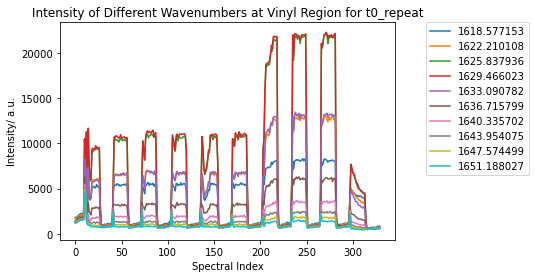

In [6]:
# Find out Vinyl Peak Wavenumber = ~1630 cm-1 Region

df.iloc[:, 375:385].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity/ a.u.')
plt.title('Intensity of Different Wavenumbers at Vinyl Region for t0_repeat')
plt.legend(bbox_to_anchor=(1.4,1), borderaxespad=0)
plt.show() 
# Plot all columns in the region to see which intensity is the highest. Pick that index location.
# The vinyl peak is the wavenumber with the highest intensity.

In [7]:
# df.loc[:,'1629.466023'] --> When using loc.
df.columns.get_loc('1629.466023') #--> Use the get_loc command on the column index to find the index location. 
# df.iloc[:,378] --> When using iloc

# Column index 378 is equivalent to column label '1629.466023'. Use relevant parameter for iloc and loc respectively.

378

# Filter Relevant Spectra

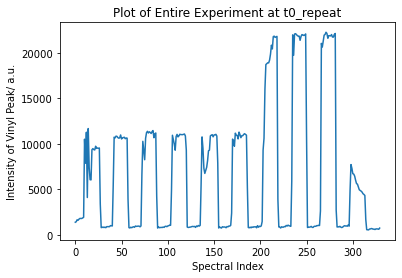

In [8]:
# Plot Vinyl Peak Wavenumber Column out.
df.loc[:330,'1629.466023'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Plot of Entire Experiment at t0_repeat')
plt.show()

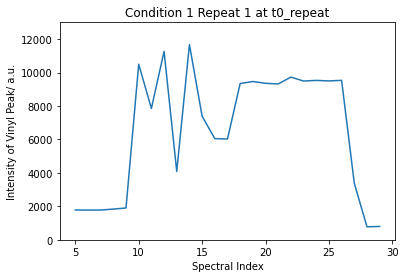

In [11]:
# Condition 
condition1 = df.iloc[5:30,:] 
condition1.loc[:,'1629.466023'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1 Repeat 1 at t0_repeat')
plt.ylim(0,13000) # Zoom in to relevant spectral range.
plt.show()

In [12]:
# Filter out relevant data to be stored and used for AUC analysis.

condition1_ss = condition1.loc[21:25, :]
condition1_ss.insert(loc = 0, column = 'Condition', value ='C1_R1')
condition1_ss

,Condition,99.466474,103.977689,108.486724,112.991457,117.494015,121.994401,126.490494,130.982299,135.476179,...,2470.127521,2473.292006,2476.455263,2479.615672,2482.776474,2485.936050,2489.092782,2492.249908,2495.404193,2498.554024
21,C1_R1,8949.0,10006.0,9786.0,9434.0,8519.0,7737.0,6802.0,6271.0,5808.0,...,135.0,111.0,169.0,183.0,129.0,164.0,201.0,181.0,167.0,148.0
22,C1_R1,8977.0,9689.0,9774.0,9150.0,8529.0,7782.0,6820.0,6365.0,5750.0,...,128.0,94.0,170.0,103.0,134.0,148.0,150.0,141.0,187.0,96.0
23,C1_R1,8935.0,9822.0,9940.0,9368.0,8704.0,7629.0,6902.0,6208.0,5961.0,...,95.0,104.0,193.0,168.0,104.0,141.0,195.0,142.0,181.0,149.0
24,C1_R1,9172.0,9847.0,10034.0,9274.0,8630.0,7849.0,6989.0,6294.0,5783.0,...,154.0,117.0,217.0,210.0,144.0,164.0,180.0,167.0,195.0,160.0
25,C1_R1,8647.0,9796.0,9936.0,9400.0,8495.0,7685.0,6813.0,6352.0,5693.0,...,150.0,98.0,151.0,149.0,122.0,147.0,180.0,173.0,198.0,160.0


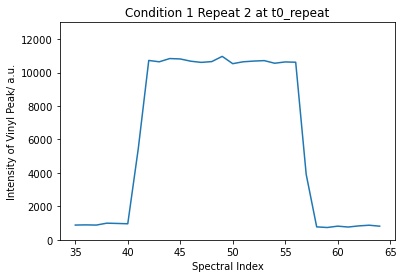

In [17]:
# condition 
condition2 = df.iloc[35:65,:] 
condition2.loc[:,'1629.466023'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1 Repeat 2 at t0_repeat')
plt.ylim(0,13000) # Zoom in to relevant spectral range.
plt.show()

In [18]:
# Filter out relevant data to be stored and used for AUC analysis.

condition2_ss = condition2.loc[50:54, :]
condition2_ss.insert(loc = 0, column = 'Condition', value ='C1_R2')
condition2_ss

,Condition,99.466474,103.977689,108.486724,112.991457,117.494015,121.994401,126.490494,130.982299,135.476179,...,2470.127521,2473.292006,2476.455263,2479.615672,2482.776474,2485.936050,2489.092782,2492.249908,2495.404193,2498.554024
50,C1_R2,9024.0,9921.0,9910.0,9552.0,8823.0,7887.0,6884.0,6390.0,6004.0,...,159.0,123.0,189.0,154.0,133.0,112.0,141.0,115.0,145.0,97.0
51,C1_R2,9258.0,9852.0,9975.0,9531.0,8838.0,7791.0,7059.0,6338.0,6047.0,...,131.0,120.0,85.0,147.0,159.0,192.0,131.0,127.0,153.0,163.0
52,C1_R2,9210.0,10061.0,10119.0,9637.0,8846.0,7788.0,6956.0,6438.0,6000.0,...,137.0,126.0,147.0,113.0,99.0,111.0,158.0,144.0,176.0,156.0
53,C1_R2,8975.0,9974.0,9929.0,9526.0,8898.0,7917.0,6964.0,6466.0,6000.0,...,159.0,63.0,220.0,123.0,127.0,101.0,113.0,112.0,161.0,97.0
54,C1_R2,9107.0,9963.0,10031.0,9750.0,8755.0,7766.0,7188.0,6506.0,6068.0,...,104.0,81.0,164.0,88.0,99.0,126.0,183.0,100.0,153.0,153.0


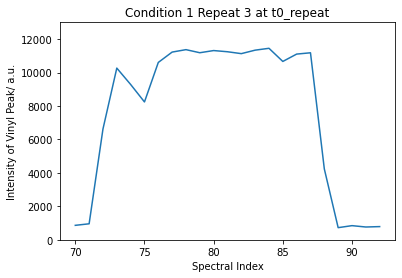

In [23]:
# Condition
condition3 = df.iloc[70:93,:] 
condition3.loc[:,'1629.466023'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1 Repeat 3 at t0_repeat')
plt.ylim(0,13000) # Zoom in to relevant spectral range.
plt.show()

In [24]:
# Filter out relevant data to be stored and used for AUC analysis.

condition3_ss = condition3.loc[80:84, :]
condition3_ss.insert(loc = 0, column = 'Condition', value = 'C1_R3')
condition3_ss

,Condition,99.466474,103.977689,108.486724,112.991457,117.494015,121.994401,126.490494,130.982299,135.476179,...,2470.127521,2473.292006,2476.455263,2479.615672,2482.776474,2485.936050,2489.092782,2492.249908,2495.404193,2498.554024
80,C1_R3,9144.0,10125.0,10170.0,9593.0,8861.0,7917.0,7165.0,6378.0,6101.0,...,97.0,126.0,155.0,134.0,126.0,90.0,189.0,107.0,209.0,104.0
81,C1_R3,9141.0,10116.0,10131.0,9716.0,8831.0,8070.0,7110.0,6463.0,6232.0,...,107.0,102.0,189.0,142.0,120.0,107.0,99.0,156.0,205.0,157.0
82,C1_R3,9105.0,10083.0,10085.0,9761.0,8782.0,7897.0,7074.0,6533.0,6105.0,...,100.0,61.0,136.0,160.0,159.0,138.0,141.0,104.0,177.0,149.0
83,C1_R3,9261.0,10161.0,10151.0,9728.0,8841.0,7771.0,7176.0,6426.0,6142.0,...,138.0,71.0,133.0,163.0,131.0,109.0,123.0,99.0,187.0,139.0
84,C1_R3,8956.0,9891.0,10234.0,9536.0,8790.0,7936.0,7075.0,6387.0,6128.0,...,135.0,93.0,115.0,104.0,150.0,136.0,126.0,120.0,154.0,143.0


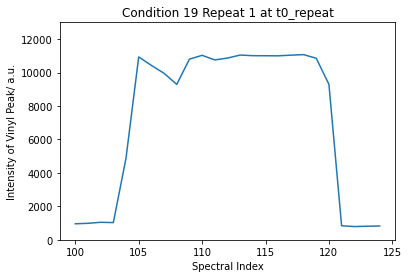

In [26]:
# Condition
condition4 = df.iloc[100:125,:] 
condition4.loc[:,'1629.466023'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 19 Repeat 1 at t0_repeat')
plt.ylim(0,13000) # Zoom in to relevant spectral range.
plt.show()

In [27]:
# Filter out relevant data to be stored and used for AUC analysis.

condition4_ss = condition4.loc[112:116, :]
condition4_ss.insert(loc = 0, column = 'Condition', value = 'C19_R1')
condition4_ss

,Condition,99.466474,103.977689,108.486724,112.991457,117.494015,121.994401,126.490494,130.982299,135.476179,...,2470.127521,2473.292006,2476.455263,2479.615672,2482.776474,2485.936050,2489.092782,2492.249908,2495.404193,2498.554024
112,C19_R1,9325.0,9892.0,10153.0,9847.0,8868.0,7935.0,7103.0,6541.0,6230.0,...,149.0,84.0,148.0,108.0,110.0,113.0,99.0,58.0,97.0,123.0
113,C19_R1,9193.0,10090.0,10123.0,9420.0,8831.0,8239.0,7057.0,6430.0,6106.0,...,104.0,93.0,137.0,112.0,107.0,135.0,133.0,133.0,124.0,88.0
114,C19_R1,9106.0,10047.0,10077.0,9738.0,8905.0,7953.0,7115.0,6631.0,5884.0,...,104.0,96.0,131.0,158.0,137.0,116.0,195.0,140.0,136.0,94.0
115,C19_R1,8945.0,9940.0,10121.0,9673.0,9041.0,7986.0,7119.0,6384.0,6047.0,...,88.0,86.0,91.0,105.0,96.0,127.0,116.0,57.0,133.0,115.0
116,C19_R1,9187.0,10209.0,9896.0,9790.0,9010.0,8048.0,7126.0,6377.0,5988.0,...,92.0,98.0,116.0,115.0,56.0,125.0,136.0,83.0,115.0,68.0


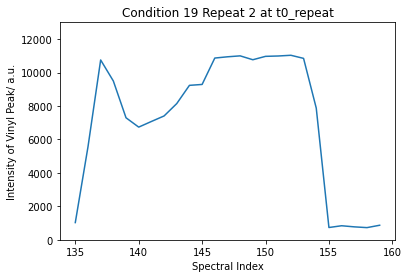

In [29]:
# Condition
condition5 = df.iloc[135:160,:] 
condition5.loc[:,'1629.466023'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 19 Repeat 2 at t0_repeat')
plt.ylim(0,13000) # Zoom in to relevant spectral range.
plt.show()

In [30]:
# Filter out relevant data to be stored and used for AUC analysis.

condition5_ss = condition5.loc[147:151, :]
condition5_ss.insert(loc = 0, column = 'Condition', value = 'C19_R2')
condition5_ss

,Condition,99.466474,103.977689,108.486724,112.991457,117.494015,121.994401,126.490494,130.982299,135.476179,...,2470.127521,2473.292006,2476.455263,2479.615672,2482.776474,2485.936050,2489.092782,2492.249908,2495.404193,2498.554024
147,C19_R2,9181.0,10189.0,10041.0,9589.0,8749.0,8014.0,7082.0,6594.0,6216.0,...,133.0,107.0,196.0,134.0,123.0,116.0,149.0,121.0,174.0,130.0
148,C19_R2,8907.0,9947.0,10171.0,9444.0,8982.0,7901.0,7016.0,6543.0,5875.0,...,86.0,63.0,130.0,112.0,136.0,99.0,144.0,155.0,167.0,133.0
149,C19_R2,9313.0,10104.0,9927.0,9678.0,8849.0,7864.0,6955.0,6531.0,6054.0,...,120.0,107.0,157.0,161.0,129.0,180.0,163.0,126.0,166.0,162.0
150,C19_R2,9023.0,10084.0,10068.0,9621.0,8864.0,7888.0,7042.0,6362.0,6060.0,...,55.0,50.0,131.0,96.0,123.0,100.0,117.0,96.0,112.0,123.0
151,C19_R2,9109.0,9944.0,9999.0,9771.0,8856.0,7956.0,7404.0,6567.0,5963.0,...,108.0,59.0,141.0,98.0,158.0,113.0,101.0,90.0,175.0,112.0


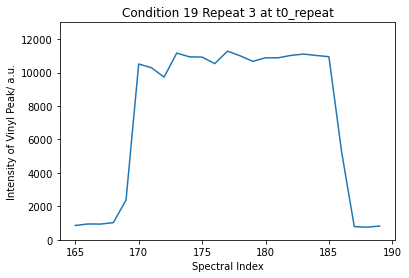

In [33]:
# Condition
condition6 = df.iloc[165:190,:] 
condition6.loc[:,'1629.466023'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 19 Repeat 3 at t0_repeat')
plt.ylim(0,13000) # Zoom in to relevant spectral range.
plt.show()

In [34]:
# Filter out relevant data to be stored and used for AUC analysis.

condition6_ss = condition6.loc[180:184, :]
condition6_ss.insert(loc = 0, column = 'Condition', value = 'C19_R3')
condition6_ss

,Condition,99.466474,103.977689,108.486724,112.991457,117.494015,121.994401,126.490494,130.982299,135.476179,...,2470.127521,2473.292006,2476.455263,2479.615672,2482.776474,2485.936050,2489.092782,2492.249908,2495.404193,2498.554024
180,C19_R3,9264.0,9911.0,10082.0,9623.0,9058.0,8043.0,7085.0,6500.0,6029.0,...,75.0,55.0,118.0,158.0,82.0,97.0,67.0,108.0,126.0,36.0
181,C19_R3,9265.0,10076.0,10292.0,9671.0,8705.0,7882.0,7083.0,6589.0,6189.0,...,100.0,72.0,190.0,146.0,71.0,101.0,113.0,120.0,156.0,130.0
182,C19_R3,9221.0,9882.0,10143.0,9694.0,8708.0,7939.0,7105.0,6714.0,6039.0,...,111.0,68.0,127.0,93.0,136.0,108.0,116.0,94.0,152.0,74.0
183,C19_R3,9171.0,10152.0,10324.0,9517.0,8784.0,8042.0,7135.0,6499.0,6069.0,...,76.0,31.0,118.0,113.0,121.0,55.0,80.0,120.0,115.0,133.0
184,C19_R3,9289.0,10050.0,9894.0,9698.0,8784.0,7871.0,7168.0,6507.0,6162.0,...,116.0,130.0,141.0,177.0,116.0,100.0,140.0,103.0,134.0,128.0


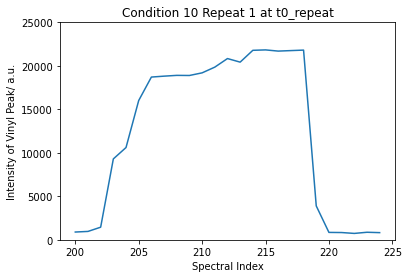

In [37]:
# Condition
condition7 = df.iloc[200:225,:] 
condition7.loc[:,'1629.466023'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 10 Repeat 1 at t0_repeat')
plt.ylim(0,25000) # Zoom in to relevant spectral range.
plt.show()

In [38]:
# Filter out relevant data to be stored and used for AUC analysis.

condition7_ss = condition7.loc[214:218, :]
condition7_ss.insert(loc = 0, column = 'Condition', value = 'C10_R1')
condition7_ss

,Condition,99.466474,103.977689,108.486724,112.991457,117.494015,121.994401,126.490494,130.982299,135.476179,...,2470.127521,2473.292006,2476.455263,2479.615672,2482.776474,2485.936050,2489.092782,2492.249908,2495.404193,2498.554024
214,C10_R1,11024.0,12457.0,12519.0,12059.0,11175.0,10527.0,9239.0,8756.0,8036.0,...,111.0,76.0,157.0,122.0,133.0,120.0,169.0,135.0,152.0,123.0
215,C10_R1,10866.0,12119.0,12621.0,12045.0,11202.0,10287.0,9302.0,8710.0,7967.0,...,97.0,82.0,133.0,113.0,125.0,122.0,150.0,136.0,125.0,162.0
216,C10_R1,11148.0,12335.0,12430.0,12225.0,11014.0,10203.0,9323.0,8680.0,8104.0,...,116.0,127.0,161.0,165.0,135.0,127.0,165.0,127.0,158.0,146.0
217,C10_R1,11003.0,12133.0,12592.0,12265.0,11166.0,10121.0,9215.0,8705.0,7949.0,...,168.0,92.0,95.0,128.0,98.0,139.0,96.0,131.0,140.0,106.0
218,C10_R1,10935.0,12051.0,12455.0,11945.0,11312.0,10423.0,9146.0,8693.0,7939.0,...,90.0,144.0,162.0,133.0,149.0,88.0,164.0,132.0,111.0,123.0


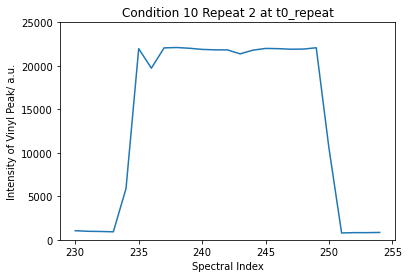

In [40]:
# Condition
condition8 = df.iloc[230:255,:] 
condition8.loc[:,'1629.466023'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 10 Repeat 2 at t0_repeat')
plt.ylim(0,25000) # Zoom in to relevant spectral range.
plt.show()

In [41]:
# Filter out relevant data to be stored and used for AUC analysis.

condition8_ss = condition8.loc[244:248, :]
condition8_ss.insert(loc = 0, column = 'Condition', value = 'C10_R2')
condition8_ss

,Condition,99.466474,103.977689,108.486724,112.991457,117.494015,121.994401,126.490494,130.982299,135.476179,...,2470.127521,2473.292006,2476.455263,2479.615672,2482.776474,2485.936050,2489.092782,2492.249908,2495.404193,2498.554024
244,C10_R2,11059.0,12251.0,12774.0,12203.0,11397.0,10365.0,9363.0,8671.0,7999.0,...,139.0,130.0,146.0,151.0,134.0,145.0,95.0,145.0,125.0,194.0
245,C10_R2,11204.0,12424.0,12796.0,12269.0,11378.0,10415.0,9474.0,8651.0,8203.0,...,104.0,89.0,122.0,99.0,150.0,133.0,119.0,126.0,104.0,119.0
246,C10_R2,11206.0,12288.0,12446.0,12159.0,11469.0,10414.0,9381.0,8610.0,8043.0,...,165.0,78.0,183.0,117.0,166.0,124.0,172.0,121.0,212.0,88.0
247,C10_R2,10973.0,12502.0,12719.0,12248.0,11066.0,10279.0,9279.0,8716.0,7924.0,...,128.0,118.0,145.0,156.0,116.0,139.0,163.0,133.0,142.0,114.0
248,C10_R2,11008.0,12427.0,12627.0,12215.0,11350.0,10497.0,9461.0,8639.0,8071.0,...,154.0,99.0,197.0,159.0,130.0,142.0,169.0,112.0,151.0,194.0


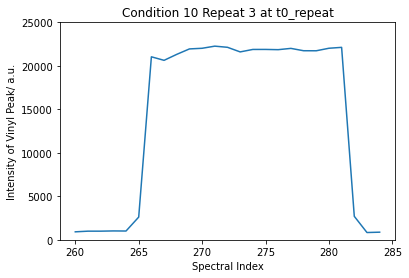

In [43]:
# Condition
condition9 = df.iloc[260:285,:] 
condition9.loc[:,'1629.466023'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 10 Repeat 3 at t0_repeat')
plt.ylim(0,25000) # Zoom in to relevant spectral range.
plt.show()

In [44]:
# Filter out relevant data to be stored and used for AUC analysis.

condition9_ss = condition9.loc[275:279, :]
condition9_ss.insert(loc = 0, column = 'Condition', value = 'C10_R3')
condition9_ss

,Condition,99.466474,103.977689,108.486724,112.991457,117.494015,121.994401,126.490494,130.982299,135.476179,...,2470.127521,2473.292006,2476.455263,2479.615672,2482.776474,2485.936050,2489.092782,2492.249908,2495.404193,2498.554024
275,C10_R3,11025.0,12348.0,12460.0,12494.0,11381.0,10272.0,9580.0,8505.0,8219.0,...,132.0,138.0,181.0,125.0,157.0,99.0,191.0,138.0,191.0,163.0
276,C10_R3,10875.0,12437.0,12389.0,12148.0,11360.0,10347.0,9225.0,8598.0,8078.0,...,112.0,141.0,167.0,119.0,65.0,97.0,167.0,135.0,164.0,159.0
277,C10_R3,11122.0,12239.0,12541.0,12299.0,11330.0,10270.0,9562.0,8590.0,7928.0,...,140.0,87.0,134.0,178.0,157.0,89.0,132.0,108.0,167.0,157.0
278,C10_R3,11046.0,12200.0,12591.0,12156.0,11434.0,10446.0,9377.0,8611.0,8069.0,...,138.0,85.0,171.0,153.0,157.0,126.0,165.0,121.0,169.0,137.0
279,C10_R3,11146.0,12322.0,12889.0,12177.0,11264.0,10415.0,9410.0,8357.0,8128.0,...,105.0,83.0,115.0,145.0,86.0,127.0,119.0,106.0,140.0,129.0


In [45]:
df_ = pd.concat([condition1_ss, condition2_ss, condition3_ss, condition4_ss, condition5_ss, condition6_ss, condition7_ss,
                 condition8_ss, condition9_ss])
# Concatenate all relevant slug dataframes.

df_

,Condition,99.466474,103.977689,108.486724,112.991457,117.494015,121.994401,126.490494,130.982299,135.476179,...,2470.127521,2473.292006,2476.455263,2479.615672,2482.776474,2485.936050,2489.092782,2492.249908,2495.404193,2498.554024
21,C1_R1,8949.0,10006.0,9786.0,9434.0,8519.0,7737.0,6802.0,6271.0,5808.0,...,135.0,111.0,169.0,183.0,129.0,164.0,201.0,181.0,167.0,148.0
22,C1_R1,8977.0,9689.0,9774.0,9150.0,8529.0,7782.0,6820.0,6365.0,5750.0,...,128.0,94.0,170.0,103.0,134.0,148.0,150.0,141.0,187.0,96.0
23,C1_R1,8935.0,9822.0,9940.0,9368.0,8704.0,7629.0,6902.0,6208.0,5961.0,...,95.0,104.0,193.0,168.0,104.0,141.0,195.0,142.0,181.0,149.0
24,C1_R1,9172.0,9847.0,10034.0,9274.0,8630.0,7849.0,6989.0,6294.0,5783.0,...,154.0,117.0,217.0,210.0,144.0,164.0,180.0,167.0,195.0,160.0
25,C1_R1,8647.0,9796.0,9936.0,9400.0,8495.0,7685.0,6813.0,6352.0,5693.0,...,150.0,98.0,151.0,149.0,122.0,147.0,180.0,173.0,198.0,160.0
50,C1_R2,9024.0,9921.0,9910.0,9552.0,8823.0,7887.0,6884.0,6390.0,6004.0,...,159.0,123.0,189.0,154.0,133.0,112.0,141.0,115.0,145.0,97.0
51,C1_R2,9258.0,9852.0,9975.0,9531.0,8838.0,7791.0,7059.0,6338.0,6047.0,...,131.0,120.0,85.0,147.0,159.0,192.0,131.0,127.0,153.0,163.0
52,C1_R2,9210.0,10061.0,10119.0,9637.0,8846.0,7788.0,6956.0,6438.0,6000.0,...,137.0,126.0,147.0,113.0,99.0,111.0,158.0,144.0,176.0,156.0
53,C1_R2,8975.0,9974.0,9929.0,9526.0,8898.0,7917.0,6964.0,6466.0,6000.0,...,159.0,63.0,220.0,123.0,127.0,101.0,113.0,112.0,161.0,97.0
54,C1_R2,9107.0,9963.0,10031.0,9750.0,8755.0,7766.0,7188.0,6506.0,6068.0,...,104.0,81.0,164.0,88.0,99.0,126.0,183.0,100.0,153.0,153.0


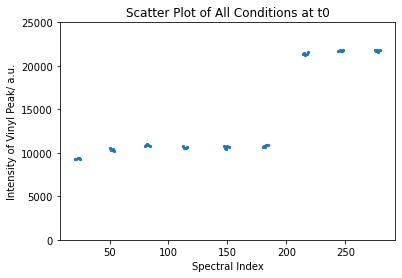

In [46]:
x = df_.index # Extract row indices (spectral index).
y = df_.iloc[:,378] # Extract intensity of vinyl peak.
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Scatter Plot of All Conditions at t0')
plt.ylim(0, 25000)

plt.scatter(x,y, s = 5) # Render a scatter plot between x and y, with size of dots = 5.
plt.show()

# Verify Manual Labeling Accuracy

In [47]:
df_['Condition'] = df_['Condition'].astype('category')
df_['Condition'].nunique()
# Verify number of unique categories. This must correspond with the number of conditions.

9

In [48]:
# Inspect df_.
df_

,Condition,99.466474,103.977689,108.486724,112.991457,117.494015,121.994401,126.490494,130.982299,135.476179,...,2470.127521,2473.292006,2476.455263,2479.615672,2482.776474,2485.936050,2489.092782,2492.249908,2495.404193,2498.554024
21,C1_R1,8949.0,10006.0,9786.0,9434.0,8519.0,7737.0,6802.0,6271.0,5808.0,...,135.0,111.0,169.0,183.0,129.0,164.0,201.0,181.0,167.0,148.0
22,C1_R1,8977.0,9689.0,9774.0,9150.0,8529.0,7782.0,6820.0,6365.0,5750.0,...,128.0,94.0,170.0,103.0,134.0,148.0,150.0,141.0,187.0,96.0
23,C1_R1,8935.0,9822.0,9940.0,9368.0,8704.0,7629.0,6902.0,6208.0,5961.0,...,95.0,104.0,193.0,168.0,104.0,141.0,195.0,142.0,181.0,149.0
24,C1_R1,9172.0,9847.0,10034.0,9274.0,8630.0,7849.0,6989.0,6294.0,5783.0,...,154.0,117.0,217.0,210.0,144.0,164.0,180.0,167.0,195.0,160.0
25,C1_R1,8647.0,9796.0,9936.0,9400.0,8495.0,7685.0,6813.0,6352.0,5693.0,...,150.0,98.0,151.0,149.0,122.0,147.0,180.0,173.0,198.0,160.0
50,C1_R2,9024.0,9921.0,9910.0,9552.0,8823.0,7887.0,6884.0,6390.0,6004.0,...,159.0,123.0,189.0,154.0,133.0,112.0,141.0,115.0,145.0,97.0
51,C1_R2,9258.0,9852.0,9975.0,9531.0,8838.0,7791.0,7059.0,6338.0,6047.0,...,131.0,120.0,85.0,147.0,159.0,192.0,131.0,127.0,153.0,163.0
52,C1_R2,9210.0,10061.0,10119.0,9637.0,8846.0,7788.0,6956.0,6438.0,6000.0,...,137.0,126.0,147.0,113.0,99.0,111.0,158.0,144.0,176.0,156.0
53,C1_R2,8975.0,9974.0,9929.0,9526.0,8898.0,7917.0,6964.0,6466.0,6000.0,...,159.0,63.0,220.0,123.0,127.0,101.0,113.0,112.0,161.0,97.0
54,C1_R2,9107.0,9963.0,10031.0,9750.0,8755.0,7766.0,7188.0,6506.0,6068.0,...,104.0,81.0,164.0,88.0,99.0,126.0,183.0,100.0,153.0,153.0


In [49]:
# Generate summary statistics for the vinyl wavenumber.
df_[['Condition', '1629.466023']].groupby('Condition').describe()

1629.466023                                                  \
                count     mean         std      min      25%      50%   
Condition                                                               
C10_R1            5.0  21776.0   53.628351  21696.0  21754.0  21786.0   
C10_R2            5.0  21924.6   77.238591  21802.0  21912.0  21931.0   
C10_R3            5.0  21845.4  114.711813  21733.0  21738.0  21860.0   
C19_R1            5.0  10984.2   69.070254  10865.0  10999.0  11004.0   
C19_R2            5.0  10932.0   95.838406  10765.0  10941.0  10968.0   
C19_R3            5.0  10982.4   97.940288  10881.0  10882.0  11021.0   
C1_R1             5.0   9512.6  145.562014   9317.0   9491.0   9499.0   
C1_R2             5.0  10625.4   79.770295  10530.0  10556.0  10643.0   
C1_R3             5.0  11294.8  118.168101  11130.0  11243.0  11314.0   

                             
               75%      max  
Condition                    
C10_R1     21810.0  21834.0  
C10_R2     21976.0  22002.0  
C10_R3     21888.0  22008.0  
C19_R1     11008.0  11045.0  
C19_R2     10989.0  10997.0  
C19_R3     11024.0  11104.0  
C1_R1       9530.0   9726.0  
C1_R2      10685.0  10713.0  
C1_R3      11338.0  11449.0

In [50]:
# Write extracted dataframe to csv file.
df_.to_csv(r'C:\Users\Tan Jin Da\Desktop\High Throughput Experiments Data\210224 High Throughput Experiment Conditions 1, 19 and 10 Repeat\Raman\df_t0_repeat.csv')